
a. a. Consider the dataset "exercise_21_01_26.npy" that contains $N = 20000$ observations $(\mathbf{x}_i \in \mathbb{R}^{10}, y_i \in \{-1, 1\})$, where $\mathbf{x}_i$ is a feature vector having 10 components and $y_i$ is the associated class label.

b. Implement a dimensionality reduction stage to reduce the number of features of the original data set to 2  Motivate whether the dimension ality reduction is suitable or not by observing the variance of the principal  components

c. Plot the data in the PCA domain and comment on the separability of the classification problem Choose a suitable decision statistic for this problem.  

d. Split the datat into a training part (75% of the data) and a test part (the remaining observations).  

e Implement the optimal MAP classifier for the chosen decision statistic. To implement the MAP classifier,  postulate a suitable distribution for the data.  

f. Learn the parameters of the decision statistic by using the stochastic gradient descent algorithm.  

g. Compute the empirical error probability of the MAP classifier and the learned classifier.

In [1]:
import numpy as np

D = np.load("exercise_21_01_26.npy") #import dataset

X = D[:, :-1]     # features (20000,10) #raccogliamo tutte le features, prendi tutte le righe e tutte le colonne tranne l'ultima
Y = D[:, 10]      # label (20000,) #raccogliamo tutti i label, prendi tutte le righe e solo l'ultima colonna

print("=== DATASET INFO ===") 
print("Shape:", D.shape) #stampo le dimensioni del dataset

=== DATASET INFO ===
Shape: (20000, 11)


(20000, 2)


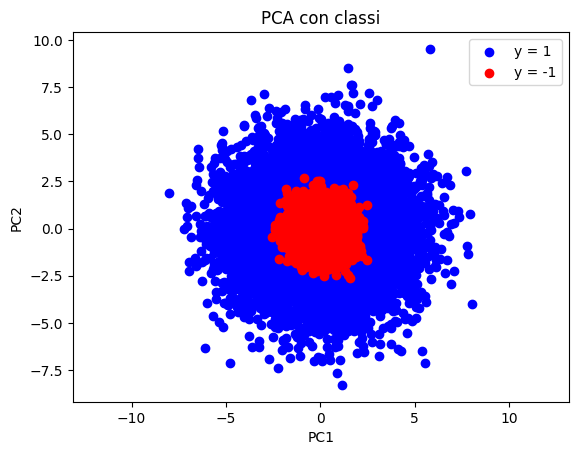

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #creo un oggetto PCA con 2 componenti principali
D_10 = D[:, :10] #prendo le prime 10 colonne del dataset
X_pca = pca.fit_transform(D_10) #applico la PCA alle prime 10 colonne del dataset, escludendo la 10-esima colonna (dove si trovano i label)

print(X_pca.shape)
plt.figure() #creo una figura

plt.scatter(
    X_pca[Y == 1, 0], #prendo nella prima componente principale i valori corrispondenti ai label(Y) = 1
    X_pca[Y == 1, 1], #prendo nella seconda componente principale i valori corrispondenti ai label(Y) = 1
    c="blue", #coloro di blu i valori corrispondenti ai label(Y) = 1
    label="y = 1", #labelo come y = 1
)
plt.scatter(
    X_pca[Y == -1, 0], #prendo nella prima componente principale i valori corrispondenti ai label(Y) = -1
    X_pca[Y == -1, 1], #prendo nella seconda componente principale i valori corrispondenti ai label(Y) = -1
    c="red", #coloro di rosso i valori corrispondenti ai label(Y) = -1
    label="y = -1", #labelo come y = -1
)

plt.axis("equal")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA con classi")
plt.show()

la PCA cattura la struttura della varianza (la dispersione dei dati), ma non è necessariamente un algoritmo di classificazione.

Nel grafico si nota che le due classi ($y=1$ in blu e $y=-1$ in rosso) sono sovrapposte centralmente
La PCA ha fatto il suo lavoro proiettando i dati nelle direzioni di massima varianza. Notiamo che i dati blu hanno una varianza molto più elevata rispetto ai dati rossi

Poiché le due classi condividono lo stesso centro (media), la PCA non riesce a "separarle" in zone diverse del grafico. Dimostra che le classi sono distinguibili per la loro dispersione (varianza), ma non per la loro posizione media

**PUNTO A**, si applica la procedura del calcolo della pca in maniera manuale

Se abbiamo un dataset $X' \in \mathbb{R}^{n \times p}$ (dove $n$ sono le righe e $p$ le colonne), il vettore media $\mu$ contiene la media aritmetica di ogni colonna:$$\mu = \frac{1}{n} \sum_{i=1}^{n} x'_i = \left( \frac{1}{n} \sum_{i=1}^{n} x'_{i1}, \dots, \frac{1}{n} \sum_{i=1}^{n} x'_{ip} \right)$$
che nel nostro codice è X_centered

Il dataset finale $X$ è quindi la matrice:$$X = \begin{bmatrix} x'_1 - \mu \\ x'_2 - \mu \\ \vdots \\ x'_n - \mu \end{bmatrix}$$

In [3]:
D_10 = D[:, :10] #prendo le prime 10 colonne del dataset

D_10_mean= np.mean(D_10, axis=0) #calcolo la media delle prime 10 colonne del dataset
#axis=0: calcolo la media per ogni colonna, axis=1: calcolo la media per ogni riga

X_centered= D_10 - D_10_mean #centro i dati rispetto alla media

$$C = \frac{1}{n-1} X^T X$$
Dove:
$X$ è la matrice dei dati centrati (quella che nel codice chiami X_centered).
$X^T$ è la trasposta della matrice centrata.$n$ è il numero di osservazioni (righe del dataset, ovvero D_10.shape[0]).

Il prodotto $X^T X$ è il prodotto matriciale che somma i prodotti incrociati delle variabili.

In [4]:
C = (1 / (D_10.shape[0] - 1)) * X_centered.T @ X_centered #10X10

eigvals, eigvecs = np.linalg.eigh(C) #calcolo gli autovalori e gli autovettori della matrice C

Decomposizione Spettrale (Eigendecomposition)

La funzione np.linalg.eigh(C) risolve l'equazione caratteristica della matrice di covarianza:$$C \mathbf{v} = \lambda \mathbf{v}$$
Dove:

$\lambda$ (Autovalori / Eigvals): Rappresentano la quantità di varianza spiegata da ogni componente. Più alto è l'autovalore, più importante è quella direzione.

$\mathbf{v}$ (Autovettori / Eigvecs): Rappresentano le direzioni (i nuovi assi del sistema di coordinate) nello spazio originale. Questi vettori sono tra loro ortogonali (perpendicolari).

Nota tecnica: Si usa eigh invece di eig perché la matrice di covarianza è simmetrica. eigh è più veloce e numericamente più stabile per matrici simmetriche.

Per trovare questi valori di $\lambda$, dobbiamo risolvere l'equazione caratteristica:$$\det(C - \lambda I) = 0$$

In [5]:
idx = np.argsort(eigvals)[::-1] # Restituisce gli indici che ordinerebbero l'array in modo crescente
eigvals = eigvals[idx] #ordino gli autovalori in modo decrescente
eigvecs = eigvecs[:, idx] #ordino gli autovettori in modo decrescente

Cosa ottieni dopo l'ordinamento?

eigvals[0]: La varianza spiegata dalla Prima Componente Principale (PC1).

eigvecs[:, 0]: Il vettore che definisce la direzione della PC1.

In [6]:
W = eigvecs[:, :2] #prendo solo le prime 2 colonne degli autovettori

L'obiettivo è trovare una direzione $w$ (un vettore) tale che, quando proiettiamo i dati su di essa, la varianza sia massima.

$$w^{(1)} = \arg \max_{w \in \mathbb{R}^p} \left\{ \frac{1}{n-1} \sum_{i=1}^{n} \left( \sum_{j=1}^{p} x_{ij}w_j \right)^2 \right\} \quad \text{con vincolo } \|w\| = 1$$

Principal Component Score:

 Il termine $\sum_{j=1}^p x_{ij}w_j$ è il prodotto scalare tra il dato $x_i$ e il vettore direzione $w$. 
 
 Rappresenta la proiezione del punto sulla nuova retta.Massimizzazione: Elevando al quadrato e mediando ($\frac{1}{n-1}\sum$), stiamo cercando la direzione che mantiene la più alta dispersione (varianza) dei dati originali.
 (riga a seguire non si farà solo per la prima componente ma per tutte le componenti presenti in w)

In [7]:
X_pca_manual = X_centered @ W #proietto i dati centrati sulle prime 2 componenti principali tramite prodotto matriciale tra X senza media e W

letteralmente
$T= XW$

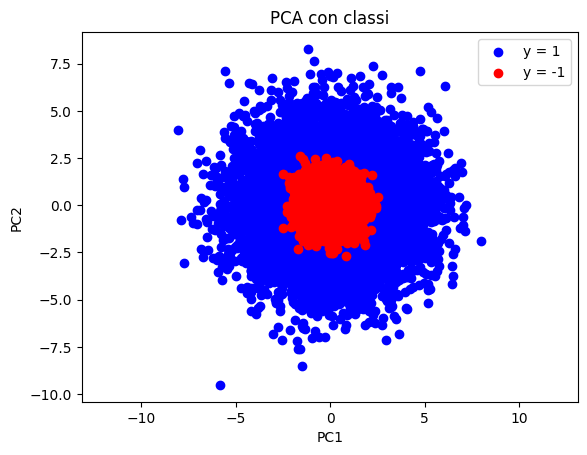

In [8]:

plt.figure()

plt.scatter(
    X_pca_manual[Y == 1, 0],
    X_pca_manual[Y == 1, 1],
    c="blue",
    label="y = 1",
)
plt.scatter(
    X_pca_manual[Y == -1, 0],
    X_pca_manual[Y == -1, 1],
    c="red",
    label="y = -1",
)
plt.axis("equal")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA con classi")
plt.show()

**Punto B**

In [9]:
# Gli autovalori sono già le varianze di PC1, PC2, ..., PCn
varianze_assolute = eigvals 
for i, v in enumerate(varianze_assolute):
    print(f"Varianza spiegata dalla PC{i+1}: {v:.4f}")

varianza_totale=np.sum(eigvals)
varianza_spiegata_ratio = eigvals / varianza_totale #il totale di tutte varianza_spiegata_ratio sarà 1
print(np.sum(varianza_spiegata_ratio))


Varianza spiegata dalla PC1: 2.7710
Varianza spiegata dalla PC2: 2.7076
Varianza spiegata dalla PC3: 0.0026
Varianza spiegata dalla PC4: 0.0026
Varianza spiegata dalla PC5: 0.0026
Varianza spiegata dalla PC6: 0.0025
Varianza spiegata dalla PC7: 0.0025
Varianza spiegata dalla PC8: 0.0025
Varianza spiegata dalla PC9: 0.0025
Varianza spiegata dalla PC10: 0.0024
1.0


 Qui applichi la formula $\text{Ratio}_j = \frac{\lambda_j}{\sum \lambda}$.
 Stiamo normalizzando i dati rispetto alla varianza totale (5.49878450608)

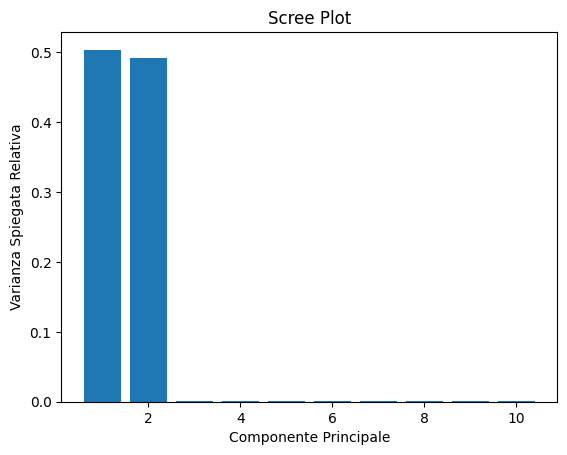

0.003222002196239549


In [10]:

plt.bar(x=range(1, len(varianza_spiegata_ratio) + 1), height=varianza_spiegata_ratio) #il for in py esclude l'ultimo valore
#sull'asse x ci saranno da 1 a a 10 componenti
plt.ylabel('Varianza Spiegata Relativa')
plt.xlabel('Componente Principale')
plt.title('Scree Plot')
plt.show()
print(np.sum(varianza_spiegata_ratio[2:-1]))

Analisi della Varianza: Dallo Scree Plot generato, si osserva che le prime due componenti (PC1 e PC2) hanno ciascuna una varianza spiegata relativa prossima a 0.5 (50%).

Sommando i ratio delle prime due componenti ($\approx 0.5 + \approx 0.5$), otteniamo quasi il 100% della varianza totale. Le restanti componenti (dalla 3 alla 10) hanno valori prossimi allo zero, la loro somma è 0.003222002196239549 su 1, indicando che non contengono informazione significativa ma solo rumore o ridondanza.

La riduzione dimensionale a $k=2$ è estremamente adeguata. Passare da 10 dimensioni a 2 permette di mantenere la quasi totalità dell'informazione originale, rendendo i dati facilmente visualizzabili senza perdite rilevanti.

**PUNTO C**

c. Plot the data in the PCA domain and comment on the separability of the classification problem Choose a suitable decision statistic for this problem.  

Come si osserva dallo scatter plot, le classi non sono linearmente separabili. Un classificatore lineare fallirebbe perché le medie delle due classi coincidono nell'origine dopo la centratura.

La "statistica di decisione ottima" per questo specifico caso è una funzione quadratica della distanza. Hai due opzioni da scrivere:

Distanza Radiale (Semplice):$$T(x) = \|x_{PCA}\|^2 = PC1^2 + PC2^2$$

Si assegna alla classe rossa se la distanza dall'origine è minore di una soglia $\tau$, altrimenti alla classe blu.

Questa statistica permette di definire una soglia radiale $\tau$ tale che:

Se $T(x) < \tau \implies y = -1$ (Classe interna)

Se $T(x) > \tau \implies y = 1$ (Classe esterna)

Distanza media classe -1 (Rossi): 1.0032
Distanza media classe 1 (Blu): 9.9134


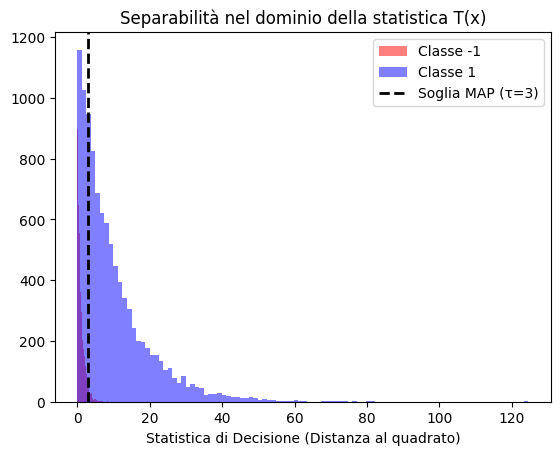

In [15]:
# Calcoliamo la statistica di decisione (distanza al quadrato)
decision_stat = np.sum(X_pca**2, axis=1)  #somma al quadrato lungo le righe

tau = 3


# Verifichiamo la separabilità stampando le medie della statistica per le due classi
print(f"Distanza media classe -1 (Rossi): {decision_stat[Y == -1].mean():.4f}")
print(f"Distanza media classe 1 (Blu): {decision_stat[Y == 1].mean():.4f}")

# Un semplice istogramma mostrerà che ora i dati sono separlabili su un asse (la distanza)
plt.figure()
plt.hist(decision_stat[Y == -1], bins=100, alpha=0.5, label='Classe -1', color='red') 
plt.hist(decision_stat[Y == 1], bins=100, alpha=0.5, label='Classe 1', color='blue')
#bins divide l'intervallo delle distanze in 100 (colonne).
#alpha rende le barre trasparendi del 50%
plt.axvline(x=tau, color='black', linestyle='--', linewidth=2, label=f'Soglia MAP (τ={tau})')

plt.xlabel('Statistica di Decisione (Distanza al quadrato)')
plt.title('Separabilità nel dominio della statistica T(x)')
plt.legend()
plt.show()

Qui stai visualizzando la tua Decision Statistic $T(x) = PC1^2 + PC2^2$.

Classe -1 (Rossi - Nucleo): La distribuzione rossa è strettissima e schiacciata vicino allo zero (Distanza media $\approx 1$). Questo conferma che i punti rossi sono tutti raggruppati vicinissimi all'origine.

Classe 1 (Blu - Corona): La distribuzione blu è molto più larga e spalmata verso destra (Distanza media $\approx 9.9$). Anche se alcuni punti blu sono vicini al centro, la maggior parte ha un'energia molto più alta.

Se scegliessi una soglia $\tau \approx 3$, potresti dire: "Tutto ciò che è sotto 3 è Rosso, tutto ciò che è sopra è Blu".Sbaglieresti solo pochi punti blu che cadono dentro il cerchio rosso, ma avresti una precisione altissima.

**PUNTO D**

d. Split the datat into a training part (75% of the data) and a test part (the remaining observations).  

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    D,     #Rappresenta la matrice dei dati 
    Y,     #La funzione deve dividere anche questo vettore nello stesso identico ordine di Dataset, in modo che ogni punto in D abbia ancora la sua etichetta corrispondente in y_train.
    test_size=0.25, 
    random_state=42,  #Assicura che la suddivisione sia riproducibile. Ogni volta che eseguirai il codice, otterrai gli stessi identici set di dati.
    stratify=Y       #Questo parametro assicura che la proporzione tra le classi (rossi e blu) rimanga la stessa sia nel training che nel test set.
)

# Verifica delle dimensioni
print(f"Dimensioni Training set: {X_train.shape[0]} campioni")
print(f"Dimensioni Test set: {X_test.shape[0]} campioni")


Dimensioni Training set: 15000 campioni
Dimensioni Test set: 5000 campioni
(20000, 2)


**PUNTO E**

e. Implement the optimal MAP classifier for the chosen decision statistic. To implement the MAP classifier,  postulate a suitable distribution for the data.  

In [39]:
import numpy as np
from scipy.stats import expon

# 1. Calcolo della statistica T(x) per Training e Test
T_train = np.sum(X_train**2, axis=1)
T_test = np.sum(X_test**2, axis=1)

# 2. Separazione della statistica per classe (nel training set)
T_train_neg = T_train[y_train == -1]  # Rossi (Nucleo)
T_train_pos = T_train[y_train == 1]   # Blu (Corona)

# 3. Stima dei parametri Likelihood (Distribuzione Esponenziale)
# La funzione fit restituisce (loc, scale). Per noi loc=0 e scale = 1/lambda = media
_, scale_neg = expon.fit(T_train_neg, floc=0) 
_, scale_pos = expon.fit(T_train_pos, floc=0)

# 4. Calcolo delle Probabilità A Priori (Priors)
prior_neg = len(T_train_neg) / len(T_train)
prior_pos = len(T_train_pos) / len(T_train)

print(f"Parametro scala (media) Rossi: {scale_neg:.4f}")
print(f"Parametro scala (media) Blu: {scale_pos:.4f}")
scale_pos, scale_neg

Parametro scala (media) Rossi: 2.0175
Parametro scala (media) Blu: 10.9121


(10.912081975222572, 2.0175433069785393)

In [38]:

scale_neg = np.mean(T_train_neg)
scale_pos = np.mean(T_train_pos)
scale_neg,scale_pos

(np.float64(2.0175433069785393), np.float64(10.912081975222572))